In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("france.csv")
data

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
0,CA Paris Alt,As Cannes,1933-07-01,5,1,F,france,CA Paris Alt (France),As Cannes (France),france,france,FR,FR,Europe,Europe,Europe,national
1,SC Fives Lille,FC Sete,1933-07-01,4,2,F,france,SC Fives Lille (France),FC Sete (France),france,france,FR,FR,Europe,Europe,Europe,national
2,Olympique Marseille,OGC Nice,1933-07-01,4,0,F,france,Olympique Marseille (France),OGC Nice (France),france,france,FR,FR,Europe,Europe,Europe,national
3,Nimes Olympique,Lille OSC,1933-07-01,3,3,F,france,Nimes Olympique (France),Lille OSC (France),france,france,FR,FR,Europe,Europe,Europe,national
4,FC Antibes,Stade Rennes,1933-07-01,1,1,F,france,FC Antibes (France),Stade Rennes (France),france,france,FR,FR,Europe,Europe,Europe,national
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27903,FC Nantes,RC Strasbourg,2019-05-24,0,1,F,france,FC Nantes (France),RC Strasbourg (France),france,france,FR,FR,Europe,Europe,Europe,national
27904,OGC Nice,As Monaco,2019-05-24,2,0,F,france,OGC Nice (France),As Monaco (France),france,france,FR,FR,Europe,Europe,Europe,national
27905,Nimes Olympique,Olympique Lyon,2019-05-24,2,3,F,france,Nimes Olympique (France),Olympique Lyon (France),france,france,FR,FR,Europe,Europe,Europe,national
27906,Stade Reims,Paris Saint Germain,2019-05-24,3,1,F,france,Stade Reims (France),Paris Saint Germain (France),france,france,FR,FR,Europe,Europe,Europe,national


In [3]:
data.describe()

,gh,ga
count,27908.000000,27908.000000
mean,1.734019,1.042461
std,1.423440,1.087670
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,12.000000,10.000000


In [4]:
data[data['gh'] == 12]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
428,FC Sochaux,Valenciennes FC,1935-07-01,12,1,F,france,FC Sochaux (France),Valenciennes FC (France),france,france,FR,FR,Europe,Europe,Europe,national


In [5]:
data[data['ga'] == 10]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
2496,RC Roubaix,Olympique Marseille,1948-12-19,2,10,F,france,RC Roubaix (France),Olympique Marseille (France),france,france,FR,FR,Europe,Europe,Europe,national
3295,Olympique Marseille,As Saint Etienne,1951-09-16,3,10,F,france,Olympique Marseille (France),As Saint Etienne (France),france,france,FR,FR,Europe,Europe,Europe,national


In [6]:
home = data[(data['gh'] > data['ga'])]

home = home['home'].value_counts().rename_axis('Team').reset_index(name='points')

home["points"] = 3 * home["points"]

away = data[(data['ga'] > data['gh'])]

away = away['away'].value_counts().rename_axis('Team').reset_index(name='points')

away["points"] = 3 * away["points"]

drawdata = data[(data['ga'] == data['gh'])]

draw = drawdata[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='points')



total = draw['points'] + home['points'] + away['points']

aggregate = total.rename_axis('Team').reset_index(name='points')

aggregate['Team'] = home['Team']

aggregate.sort_values(by='points', ascending = False).head(10)

,Team,points
0,Olympique Marseille,3922.0
1,Girondins Bordeaux,3858.0
2,As Saint Etienne,3753.0
3,As Monaco,3547.0
4,Lille OSC,3480.0
5,Olympique Lyon,3398.0
6,FC Sochaux,3227.0
7,OGC Nice,3124.0
8,FC Nantes,2929.0
9,RC Lens,2880.0


<AxesSubplot:xlabel='Team'>

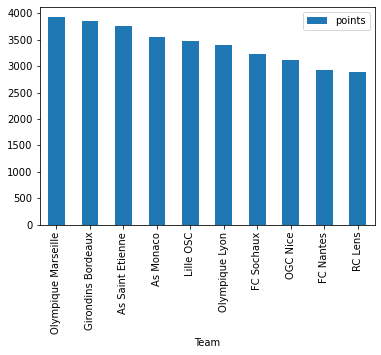

In [7]:
aggregate.sort_values(by='points', ascending = False).head(10).plot.bar(x='Team')

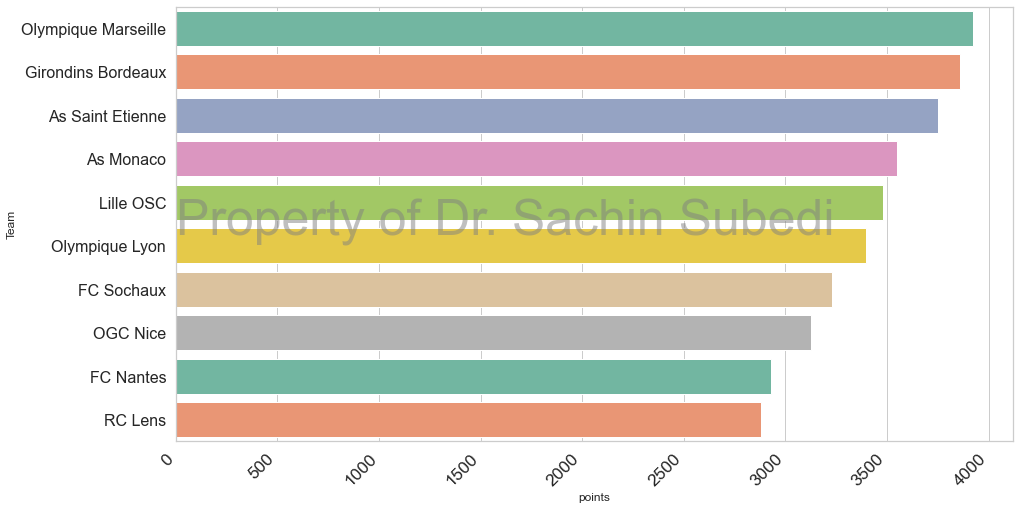

In [8]:
top = aggregate.sort_values(by='points', ascending = False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(15,8))

sns.barplot(data = top, x = 'points', y = 'Team', palette='Set2')

plt.xticks(

    rotation=45,

    horizontalalignment='right',

    fontweight='light',

    fontsize='x-large' 

)

plt.yticks(

    fontweight='light',

    fontsize='16' 

)
plt.text(3, 5, 'Property of Dr. Sachin Subedi',

         fontsize=50, color='gray',

       va='bottom', alpha=0.5)

plt.show()


In [9]:
data[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='counts')

,Team,counts
0,Olympique Marseille,2452
1,Girondins Bordeaux,2436
2,As Saint Etienne,2424
3,Lille OSC,2358
4,FC Sochaux,2350
...,...,...
67,Gfc Ajaccio,38
68,Lb Chateauroux,34
69,As Beziers,34
70,Sr Colmar,34
